# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous votre nom, prénom et numéro étudiant :
</div>

# NOMS

- LE LORIER Yann 21305562
- NGUYEN Hoang-Son 28709864

# TME 10- LIME / SHAP

<div class="alert alert-block alert-warning">
L'objet de ce TME est de tester les algorithmes LIME et SHAP sur des tâches de classification assez simple.
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1 - Préparation du dataset


<div class="alert alert-block alert-warning">
Utiliser le dataset <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI ML Breast Cancer Wisconsin (Diagnostic)</a>, comme dans le TME 3 et apprendre dessus un modèle linéaire de régression logistique
</div>

## 2- Explication avec SHAP

<div class="alert alert-block alert-warning">
Nous allons étudier une explication donnée par SHAP.
</div>

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
breast_data = load_breast_cancer()

feature_names = breast_data.feature_names

X_train, X_test, y_train, y_test = train_test_split(breast_data.data, breast_data.target, test_size=0.2)
logreg = LogisticRegression(class_weight='balanced', max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

<div class = "alert alert-block alert-info">
    Q2.1 - Exécuter le bloc ci-dessous pour obtenir les explications globales de SHAP. Commentez.
</div>

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


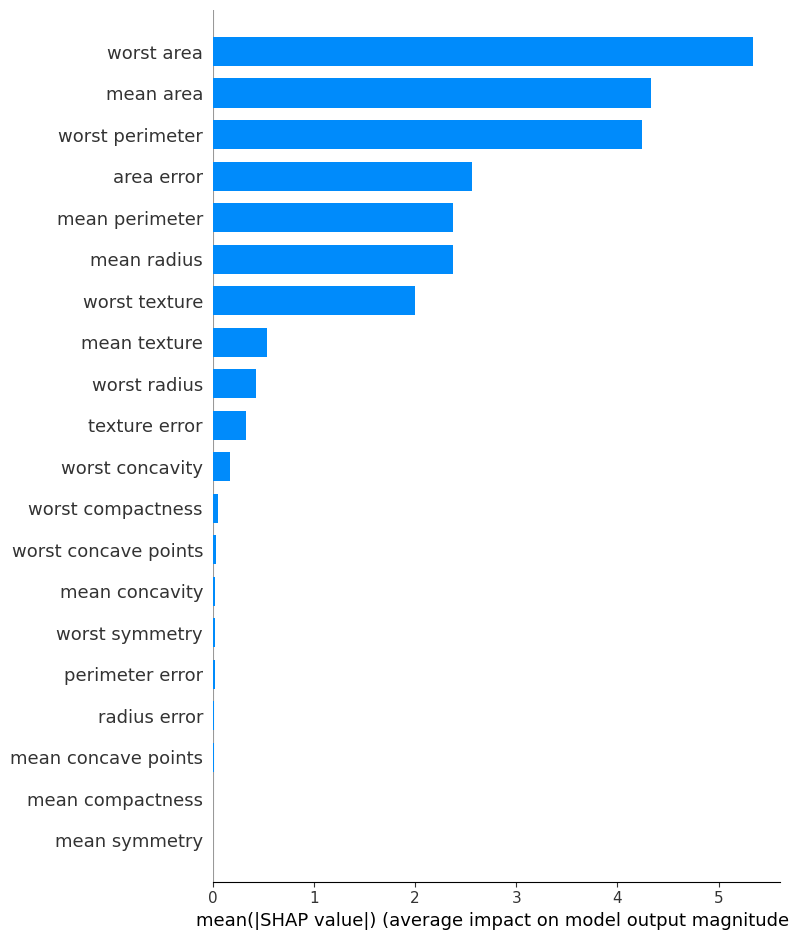

In [3]:
import shap

explainer = shap.LinearExplainer(logreg, X_train)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names)

## Commentaire :

Le SHAP value dans cette graphique explique que chaque attribut a un ordre d'importance différent par rapport aux autres, qui sont classés plus bas.

<div class = "alert alert-block alert-info">
    Q2.2 - Exécuter le bloc ci-dessous pour obtenir une explication locale avec SHAP du premier exemple de la base de test. Commentez.
</div>

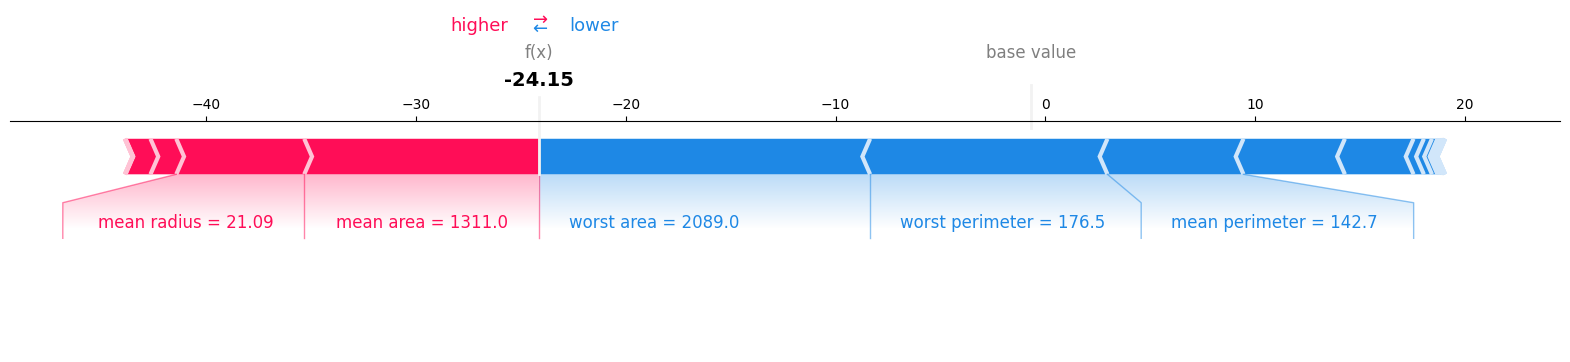

In [4]:
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[0, :],
    X_test[0, :],
    feature_names=feature_names,
    matplotlib=True
)

## Commentaire
Cette graphique montre les attributs les plus importants, comme vu dans la graphique précédente. L'information additionnelle qui est représentée ici est la direction de la contribution pour la classification.

Nous pouvons donc conclure que le modèle arrive à une valeur de classification moins importante (-19.35) car les attributs qui contribuent à cette classification "poussent" la valeur vers des valeurs négatives. Dans ce cas, l'exemple du `worst_area=1938` contribue négativement pour la valeur observée.

<div class = "alert alert-block alert-info">
    Q2.3 - Comparer avec l'exemple suivant de la base de test.
</div>

In [5]:
p = logreg.predict_proba(X_test[1:2])
1/(1+np.exp(-3.73))#(0.02348423/0.97651577)

0.9765693323263297

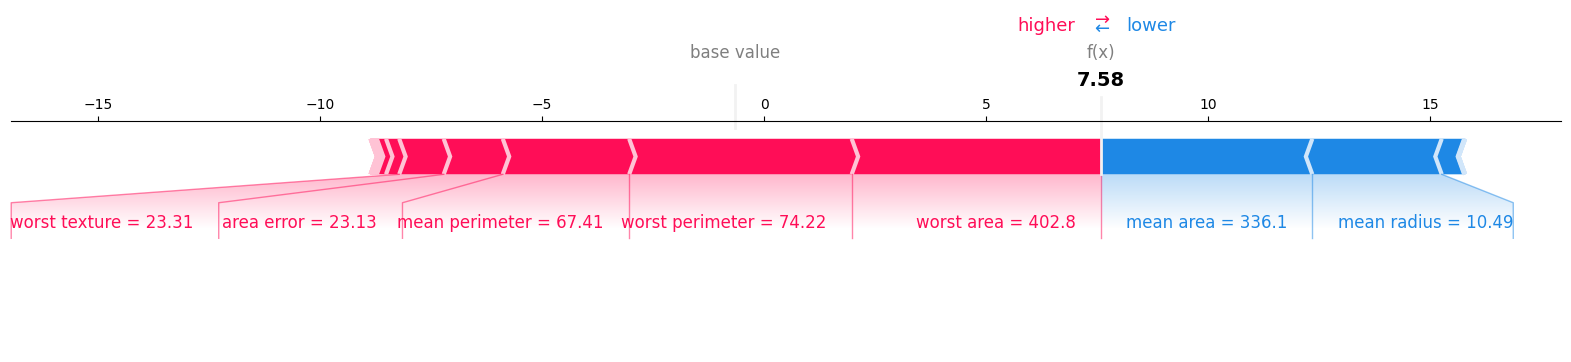

In [6]:
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[1, :],
    X_test[1, :],
    feature_names=feature_names,
    matplotlib=True
)

## 3 - Expérimentations

<div class="alert alert-block alert-warning">
    <ul>
        <li> Comparer les résultats fournis par LIME et SHAP sur des données identiques et commenter les résultats</li>
    <li> Examiner les résultats par exemple sur les données half-moons dans un cas où une explication linéaire est inappropriée</li>
    <li> Générer d'autres explications globales avec SHAP</li>
    <li> Modifier votre propre implémentation de LIME pour utiliser le noyau SHAP et comparer au résultat fourni par SHAP</li>
        </ul>
</div>

In [7]:
target_names = breast_data.target_names

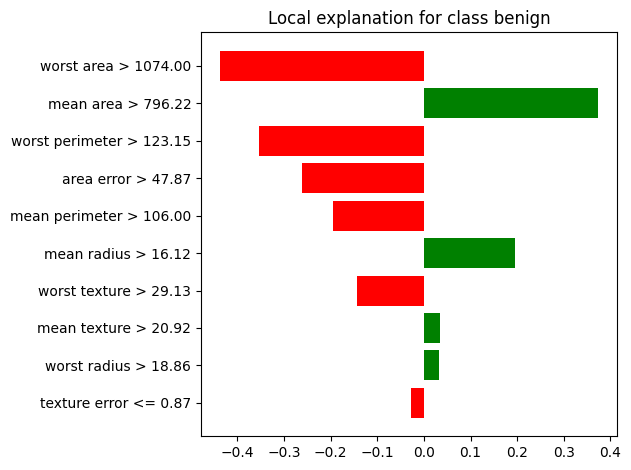

In [8]:
from lime.lime_tabular import LimeTabularExplainer
explainer_lime = LimeTabularExplainer(X_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')

exp_lime = explainer_lime.explain_instance(X_test[0], logreg.predict_proba, num_features=10)

exp_lime.as_pyplot_figure()
plt.tight_layout()

In [10]:
from sklearn.datasets import make_moons
moons, labels = make_moons(1000, noise=0.1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(moons, labels, test_size=0.2)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

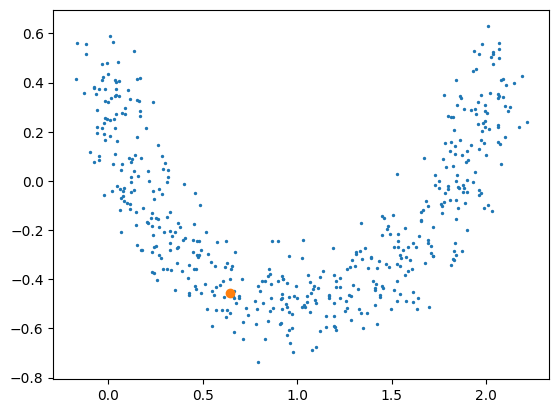

In [12]:
from sklearn.datasets import make_moons

plt.scatter(moons[labels==1][:,0], moons[labels==1][:,1], s=2)
i = 0
plt.scatter(X_test[i][0], X_test[i][1])
plt.show()

In [13]:
from sklearn.inspection import DecisionBoundaryDisplay
def visualisation_2D(data, y, clf, x) -> None:
    """
    Params:
      data: données
      y   : labels des données
      clf : un classifieur
      x   : un point de départ dont point cicle nous voulons chercher
      cfs : contrefactuels générés
    """
    disp = DecisionBoundaryDisplay.from_estimator(
      clf, data, response_method="predict",
      xlabel="X", ylabel="Y",
      alpha=0.5)
    disp.ax_.scatter(data[:, 0], data[:, 1], c=y, edgecolor="k",alpha=0.2)
    disp.ax_.scatter(x[0], x[1], color="red", label="point choisi")
    
    plt.legend()
    plt.show()
 

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, logreg.predict(X_test))

0.88

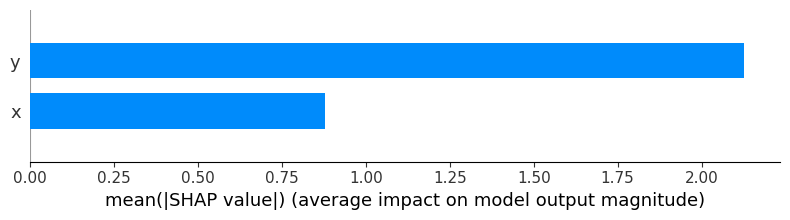

In [15]:
explainer = shap.LinearExplainer(logreg, X_train)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=['x', 'y'])

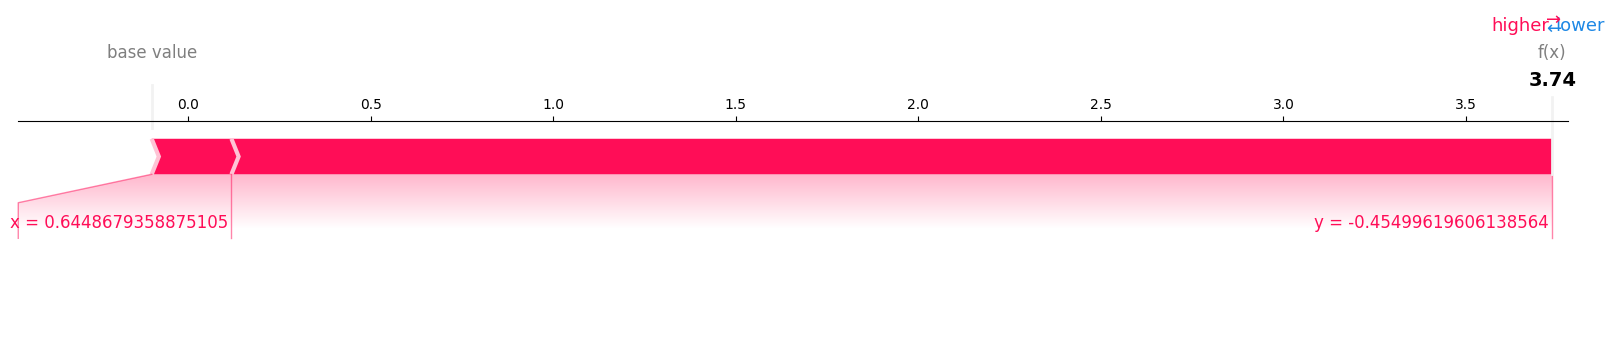

In [16]:
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[i, :],
    X_test[i, :],
    feature_names=['x', 'y'],
    matplotlib=True
)

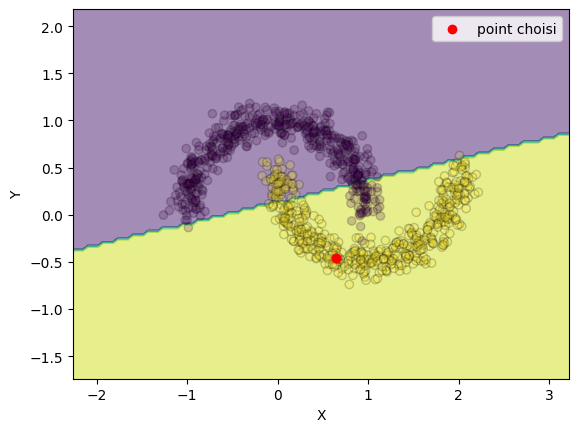

In [17]:
#data, y, clf, x, cfs
visualisation_2D(moons, labels, logreg, X_test[i])

## 4 - Données textuelles

<div class="alert alert-block alert-warning">
    Apprendre un modèle de classification random forest sur les données <code>fetch_20newsgroups</code> puis utiliser LIME et SHAP pour obtenir des explications sur la classification d'exemples.
</div>

<div class = "alert alert-block alert-info">
À l'aide de la <a href="https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py">documentation du dataset fetch_20newsgroups</a>,  apprendre un modèle random forest de classification bi-classe de texte.
</div>

In [41]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]
data_train = fetch_20newsgroups(
    subset="train",
    categories=categories,
    shuffle=True,
    random_state=42,
    remove=(),
)

data_test = fetch_20newsgroups(
    subset="test",
    categories=categories,
    shuffle=True,
    random_state=42,
    remove=(),
)

In [42]:
target_names = data_train.target_names
y_train, y_test = data_train.target, data_test.target
vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    max_df=0.5,
    min_df=5,
    stop_words='english'
)
X_train = vectorizer.fit_transform(data_train.data)

In [43]:
X_test = vectorizer.transform(data_test.data)

In [44]:
feature_names = vectorizer.get_feature_names_out()

In [45]:
from sklearn.ensemble import RandomForestClassifier
foret = RandomForestClassifier()
foret.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
from sklearn.metrics import accuracy_score

accuracy_score(foret.predict(X_test), y_test)

0.8433111603843311

<div class = "alert alert-block alert-info">
Utilisez LIME et SHAP pour obtenir des explications sur les prédictions obtenues sur des exemples.
    </div>

In [47]:
import lime
from lime import lime_tabular
from sklearn.ensemble import RandomForestClassifier

explainer_lime = lime_tabular.LimeTabularExplainer(X_train, mode='classification', training_labels=y_train, feature_names=feature_names)

In [48]:
instance = X_test[0]

exp = explainer_lime.explain_instance(instance, foret.predict_proba, num_features=len(feature_names))

In [49]:
exp.show_in_notebook(show_table=True, show_all=False)

In [50]:
import shap
mean_value = np.nanmean(X_test.data)
X_test.data = np.where(np.isnan(X_test.data), mean_value, X_test.data)
explainer_shap = shap.TreeExplainer(foret)
shap_values = explainer_shap.shap_values(X_test[0])
shap.summary_plot(shap_values, X_test)

UFuncTypeError: Cannot cast ufunc 'isnan' input from dtype('O') to dtype('bool') with casting rule 'same_kind'